In [1]:
import pickle
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.metrics.pairwise import cosine_similarity

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/elouan/miniconda3/envs/pygeo/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/elouan/miniconda3/envs/pygeo/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/elouan/miniconda3/envs/pygeo/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/elouan/miniconda3/envs/pygeo/lib/python3.9/site-packages/traitlets/config/application.py", line 845, i

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/elouan/miniconda3/envs/pygeo/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/elouan/miniconda3/envs/pygeo/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/elouan/miniconda3/envs/pygeo/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/elouan/miniconda3/envs/pygeo/lib/python3.9/site-packages/traitlets/config/application.py", line 845, i

AttributeError: _ARRAY_API not found

## 1. Load CowBERT Embeddings

In [2]:
# Load embeddings
embeddings_path = Path('cowbert_out_dim16_2000epochs')

# Load pickle format
with open(embeddings_path / 'cow_embeddings.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)

# Load metadata
with open(embeddings_path / 'embedding_metadata.json', 'r') as f:
    metadata = json.load(f)

# Load training results
with open(embeddings_path / 'training_results.txt', 'r') as f:
    training_info = f.read()

print(training_info)
print(f"\nNumber of cows: {len(embeddings_dict)}")
print(f"Embedding dimension: {metadata['embedding_dim']}")
print(f"Cow IDs: {list(embeddings_dict.keys())}")

FileNotFoundError: [Errno 2] No such file or directory: 'cowbert_out_dim16_2000epochs/cow_embeddings.pkl'

## 2. Training Metrics Visualization

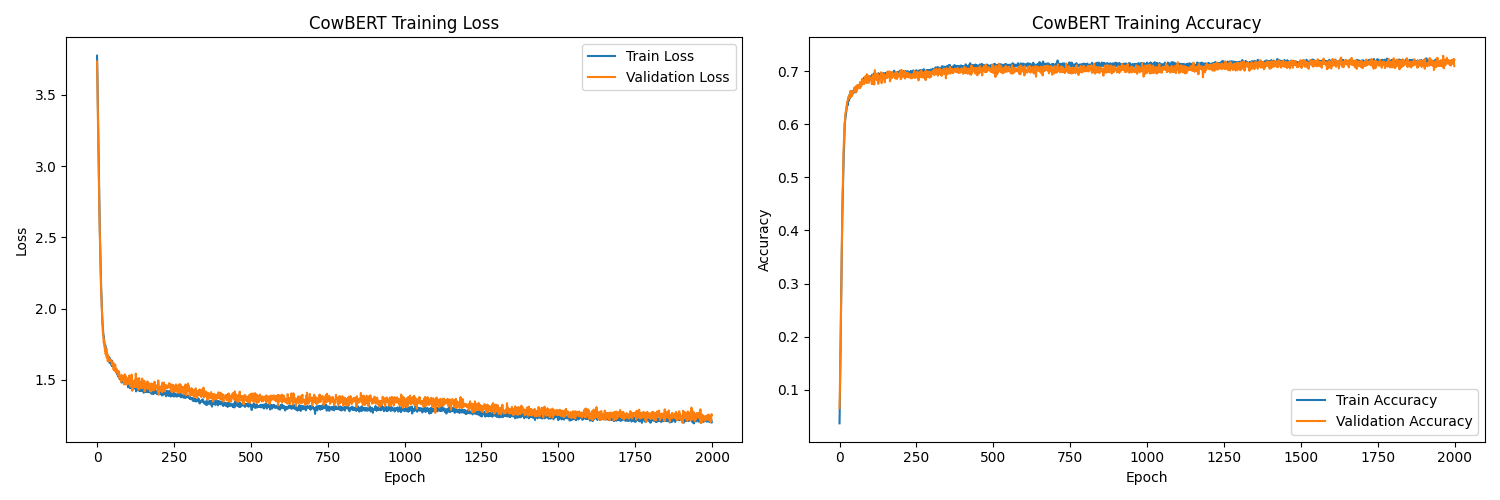

In [ ]:
# Display training metrics plot
from IPython.display import Image, display

display(Image(filename=str(embeddings_path / 'training_metrics.png')))

## 3. t-SNE Visualization

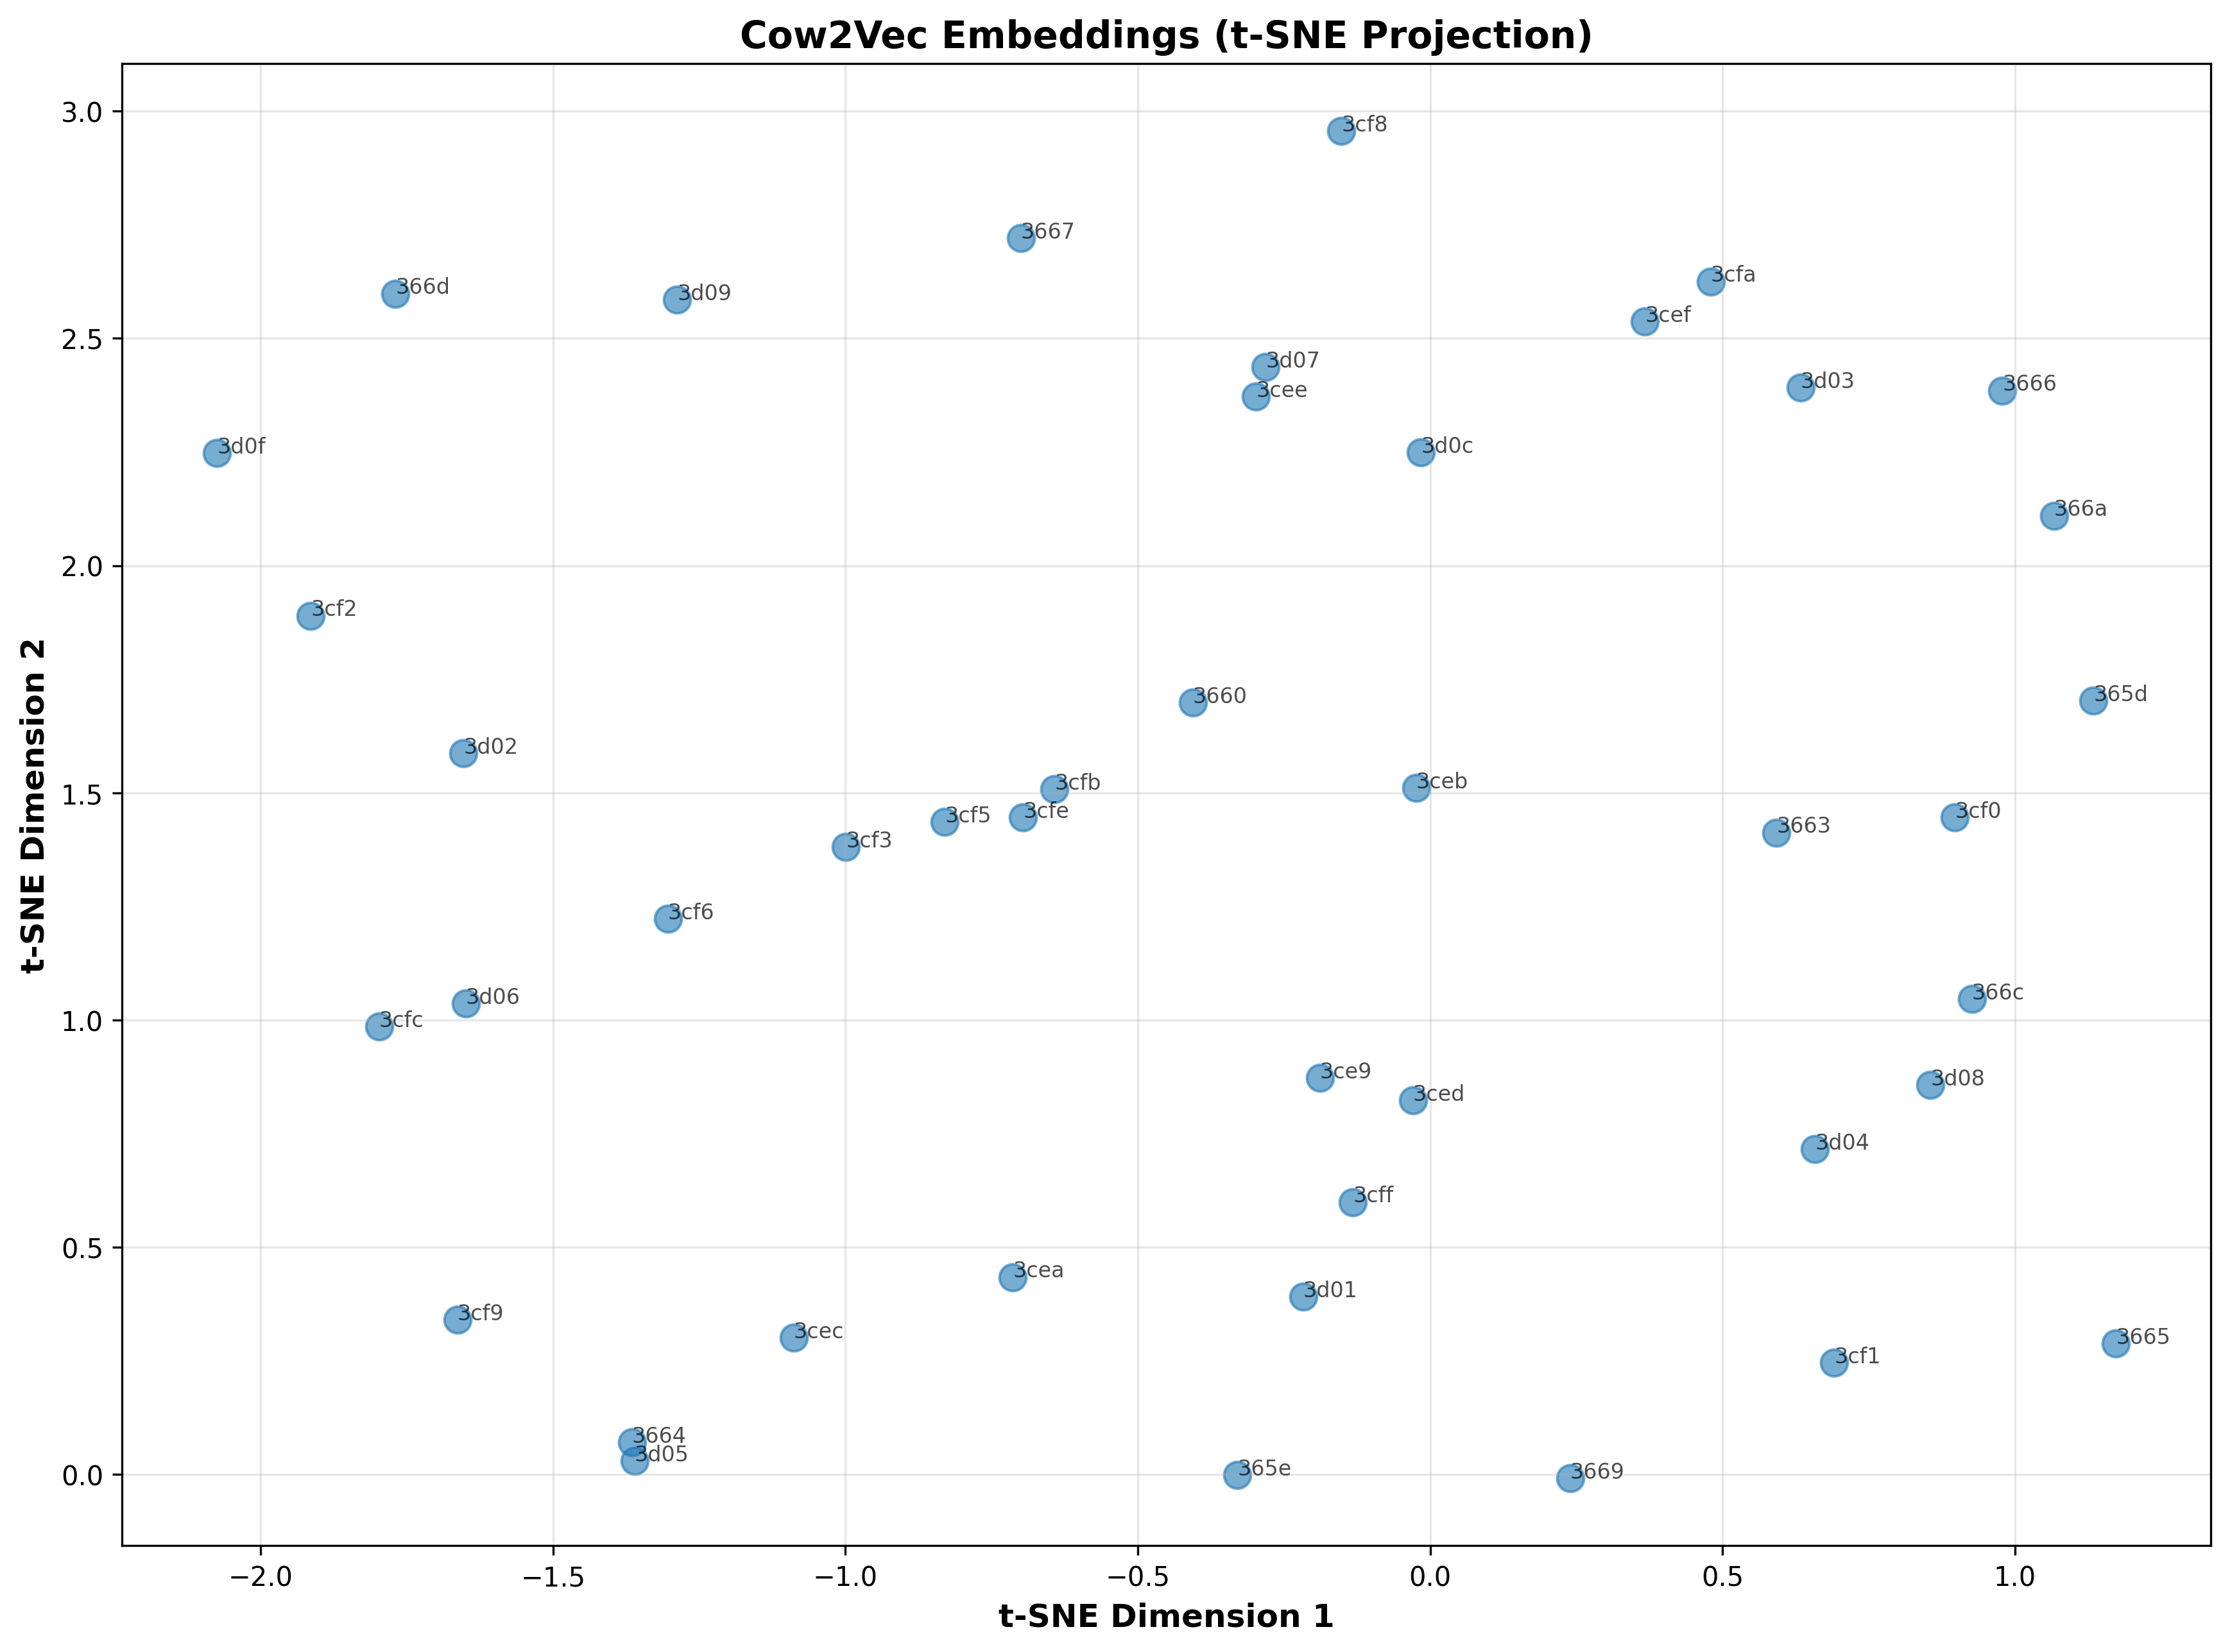

In [ ]:
# Display t-SNE visualization
display(Image(filename=str(embeddings_path / 'embeddings_tsne.png')))

## 4. Similarity Analysis

In [ ]:
# Read similarity report
with open(embeddings_path / 'similarity_report.txt', 'r') as f:
    similarity_report = f.read()

print(similarity_report)

COW2VEC SIMILARITY REPORT

Cow: 365d
Most similar cows:
  1. 3666 (similarity: 0.7415)
  2. 3cf0 (similarity: 0.6810)
  3. 3d09 (similarity: 0.6379)
  4. 366c (similarity: 0.6073)
  5. 3665 (similarity: 0.6017)

Cow: 365e
Most similar cows:
  1. 3d01 (similarity: 0.8449)
  2. 3ce9 (similarity: 0.7167)
  3. 3cff (similarity: 0.7049)
  4. 3ced (similarity: 0.6911)
  5. 3cea (similarity: 0.6712)

Cow: 3660
Most similar cows:
  1. 3cee (similarity: 0.8433)
  2. 3cf5 (similarity: 0.7734)
  3. 3d07 (similarity: 0.7343)
  4. 3d0c (similarity: 0.6756)
  5. 3cf6 (similarity: 0.6634)

Cow: 3663
Most similar cows:
  1. 3cf0 (similarity: 0.7302)
  2. 3d04 (similarity: 0.6136)
  3. 3d09 (similarity: 0.5433)
  4. 3665 (similarity: 0.5192)
  5. 3667 (similarity: 0.5175)

Cow: 3664
Most similar cows:
  1. 3d05 (similarity: 0.8688)
  2. 3cec (similarity: 0.8284)
  3. 3cf9 (similarity: 0.7615)
  4. 3d06 (similarity: 0.7589)
  5. 3cf1 (similarity: 0.7194)

Cow: 3665
Most similar cows:
  1. 3cf1 (similari

In [ ]:
# Compute similarity matrix
cow_ids = sorted(embeddings_dict.keys())
embeddings_matrix = np.array([embeddings_dict[cow_id] for cow_id in cow_ids])

# Cosine similarity
similarity_matrix = cosine_similarity(embeddings_matrix)

# Create DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, index=cow_ids, columns=cow_ids)

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(similarity_df, annot=True, fmt='.2f', cmap='RdYlGn', 
            vmin=0, vmax=1, square=True, cbar_kws={'label': 'Cosine Similarity'})
plt.title('CowBERT Embedding Similarity Matrix (Cosine)', fontsize=16, fontweight='bold')
plt.xlabel('Cow ID', fontsize=12)
plt.ylabel('Cow ID', fontsize=12)
plt.tight_layout()
plt.show()

print("\nSimilarity Statistics:")
print(f"Mean similarity: {similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)].mean():.4f}")
print(f"Std similarity: {similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)].std():.4f}")

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

## 5. Embedding Statistics

In [ ]:
# Analyze embedding dimensions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Embedding norms
norms = np.linalg.norm(embeddings_matrix, axis=1)
axes[0, 0].bar(cow_ids, norms, color='steelblue', alpha=0.7)
axes[0, 0].set_xlabel('Cow ID')
axes[0, 0].set_ylabel('L2 Norm')
axes[0, 0].set_title('Embedding Norms by Cow')
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Distribution of embedding values
axes[0, 1].hist(embeddings_matrix.flatten(), bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Embedding Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of All Embedding Values')
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Mean embedding per dimension
mean_per_dim = embeddings_matrix.mean(axis=0)
axes[1, 0].bar(range(len(mean_per_dim)), mean_per_dim, color='green', alpha=0.7)
axes[1, 0].set_xlabel('Dimension')
axes[1, 0].set_ylabel('Mean Value')
axes[1, 0].set_title('Mean Embedding Value per Dimension')
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Std per dimension
std_per_dim = embeddings_matrix.std(axis=0)
axes[1, 1].bar(range(len(std_per_dim)), std_per_dim, color='purple', alpha=0.7)
axes[1, 1].set_xlabel('Dimension')
axes[1, 1].set_ylabel('Std Value')
axes[1, 1].set_title('Std Deviation per Dimension')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nEmbedding Statistics:")
print(f"Mean norm: {norms.mean():.4f} ± {norms.std():.4f}")
print(f"Min value: {embeddings_matrix.min():.4f}")
print(f"Max value: {embeddings_matrix.max():.4f}")
print(f"Mean value: {embeddings_matrix.mean():.4f}")
print(f"Std value: {embeddings_matrix.std():.4f}")

## 6. Load Cow Metadata for Enhanced Analysis

In [ ]:
# Load cow metadata
ids_df = pd.read_csv('Identification vaches/IDs_correspondance.csv')
print("Available metadata:")
print(ids_df.head())
print(f"\nColumns: {ids_df.columns.tolist()}")

In [ ]:
# Merge embeddings with metadata
embeddings_df = pd.DataFrame([
    {'cow_id': cow_id, **{f'dim_{i}': val for i, val in enumerate(embedding)}}
    for cow_id, embedding in embeddings_dict.items()
])

# Merge with metadata if cow_id matches
if 'TAG' in ids_df.columns:
    merged_df = embeddings_df.merge(
        ids_df, 
        left_on='cow_id', 
        right_on='TAG', 
        how='left'
    )
    print("\nMerged embeddings with metadata:")
    print(merged_df.head())
else:
    print("\nCould not find matching column for cow_id in metadata")
    merged_df = embeddings_df

## 7. Top Similar Cow Pairs

In [ ]:
# Find most similar pairs
pairs = []
for i, cow1 in enumerate(cow_ids):
    for j, cow2 in enumerate(cow_ids):
        if i < j:  # Only upper triangle
            pairs.append({
                'cow1': cow1,
                'cow2': cow2,
                'similarity': similarity_matrix[i, j]
            })

pairs_df = pd.DataFrame(pairs).sort_values('similarity', ascending=False)

print("Top 10 Most Similar Cow Pairs:")
print(pairs_df.head(10).to_string(index=False))

print("\n\nTop 10 Least Similar Cow Pairs:")
print(pairs_df.tail(10).to_string(index=False))

## 8. Export Enhanced Embeddings

In [ ]:
# Save merged embeddings with metadata
output_path = embeddings_path / 'embeddings_with_metadata.csv'
merged_df.to_csv(output_path, index=False)
print(f"Saved enhanced embeddings to: {output_path}")

# Save similarity pairs
pairs_path = embeddings_path / 'similarity_pairs.csv'
pairs_df.to_csv(pairs_path, index=False)
print(f"Saved similarity pairs to: {pairs_path}")